# Linear agent, no obstacles, circular trajectory following

In [1]:
clear
yalmip clear
close all
warning off

## The agent

First we load a demo agent:

In [2]:
N = 30;     % prediction horizon
Ts = 0.25;  % sampling time
agent = optiplan.LinearAgent.demo2D('PredictionHorizon', N, 'SamplingTime', Ts)

agent = 

  LinearAgent with properties:

                 A: [4x4x30 optiplan.AgentSignal]
                 B: [4x2x30 optiplan.AgentSignal]
                 f: [4x1x30 optiplan.AgentSignal]
                 C: [2x4x30 optiplan.AgentSignal]
                 D: [2x2x30 optiplan.AgentSignal]
                 g: [2x1x30 optiplan.AgentSignal]
                nx: 4
                nu: 2
                ny: 2
                 N: 30
                 X: [4x1x31 optiplan.AgentSignal]
                 U: [2x1x30 optiplan.AgentSignal]
                 Y: [2x1x30 optiplan.AgentSignal]
              Size: [2x1x30 optiplan.AgentSignal]
    ConstraintsFun: []
      ObjectiveFun: []


Tell the agent that the position reference should be treated as a time-varying parameter:

In [3]:
agent.Y.Reference = 'parameter';

Since we will be plotting the agent as a planar object, we set its width and height to one:

In [4]:
agent.Size.Value = [1; 1];

## The planner

Next, we create a planner which will be responsible for optimizing the control inputs for the agent:

In [5]:
obstacles = []; % no obstacles in this demo
planner = optiplan.Planner(agent, obstacles, 'solver', 'gurobi')

planner = 

  Planner with properties:

      Parameters: [1x1 struct]
    MixedInteger: 1


## The Simulator

To make closed-loop simulation, we create Simulator:

In [6]:
psim = optiplan.Simulator(planner)

psim = 

  Simulator with properties:

       Results: [1x1 struct]
    Parameters: [1x1 struct]


Before starting the simulation, we need to define number of simulation steps, intial point and values for time-varying parameters:

In [7]:
Nsim = 350; % number of simulation steps
x0 = [0; 0; 0; 0]; % initial point
psim.Parameters.Agent.Y.Reference = psim.circularTrajectory(Nsim, 'Radius', 10, 'Loops', 2);

When done, we can run the simulation:

In [8]:
psim.run(x0, Nsim);

To plot the results, launch:

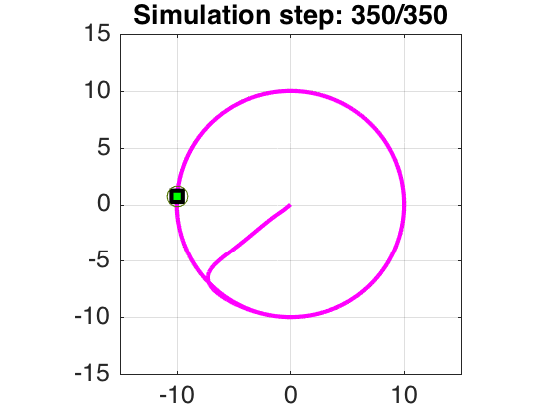

In [9]:
psim.plot('axis', [-15 15 -15 15], 'Reference', true, 'Predictions', true,...
    'PredSteps', 10, 'Trail', true);

where '`axis`' sets dimension of both axis, '`Reference`' enable/disable showing the reference, '`Predictions`' enable/disable showing ptredicted positions of the agent, '`PredSteps`' defines number of displayed predictions, '`Trail`' enable/disable showing realized trajectory of agent and '`textSize`' and '`textFont`' allow us to set the font.

## Notes & hints

**Hint**: use the `Simulator/circularTrajectory` helper to automatically create a trajectory over `Nsim` steps which follows specified circular trajectory:

In [21]:
Nsim = 20;
r = psim.circularTrajectory(Nsim, 'Radius', 5, 'Loops', 1)

w =

  Columns 1 through 13

     5     5     5     5     5     5     5     5     0     0     0     0     0
     0     0     0     0     0     0     0     0    -4    -4    -4    -4    -4

  Columns 14 through 25

     0     0     0     1     1     1     1     1     1     1     1     1
    -4    -4    -4     1     1     1     1     1     1     1     1     1
